<a href="https://colab.research.google.com/github/ha-re-ram/AIML-Lab/blob/main/AIML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
# Step 3: Explore Basic Information
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

In [ ]:
# Step 4: Check for Missing and Duplicate Values
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

Missing Values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Duplicate Rows: 0


In [ ]:
# Step 5: Handle Missing/Duplicate Values
df.drop_duplicates(inplace=True)

In [ ]:
# Step 6: Encode Categorical Columns (if any)
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male=1, Female=0

In [ ]:
# Step 7: Feature Scaling
features = ['Age', 'EstimatedSalary', 'Gender']
x = df[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Step 8: Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

In [ ]:
# Step 9: Analyze Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.40008219 0.31856284]


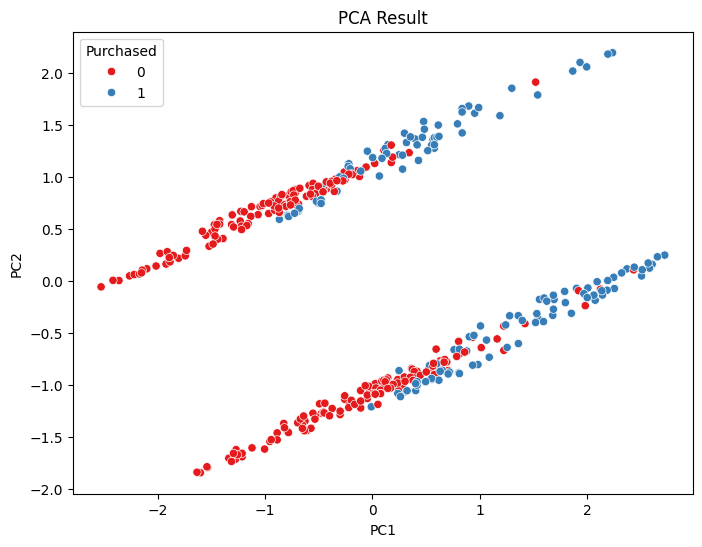

In [ ]:
# Step 10: Visualize PCA Result
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Purchased'] = df['Purchased']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Purchased', palette='Set1')
plt.title('PCA Result')
plt.show()

In [ ]:
# Step 11: Reduced Dataset for Further Use
print(pca_df.head())

        PC1       PC2  Purchased
0 -2.529709 -0.056084          0
1 -1.522671  0.334502          0
2 -0.795342 -1.439684          0
3 -0.474232 -1.269265          0
4 -1.473875  0.541042          0
